## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
#def build_mlp():
"""
Build your own model
"""
    
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = [1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.5,1.0,1.5]

In [10]:
#results = {}
"""
Build the experiment loop
"""
results = {}
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with MOMENTUM = {momentum}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-momentum-{momentum}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.5
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Us

50000/50000 [==============================] - 8s 155us/step - loss: 1.4769 - acc: 0.4802 - val_loss: 1.5241 - val_acc: 0.4622
Epoch 50/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4710 - acc: 0.4833 - val_loss: 1.5075 - val_acc: 0.4701
Experiment with MOMENTUM = 1.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)    

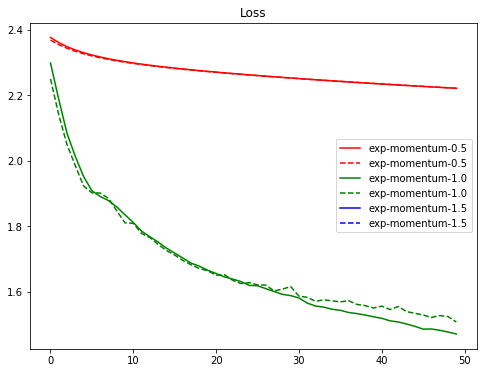

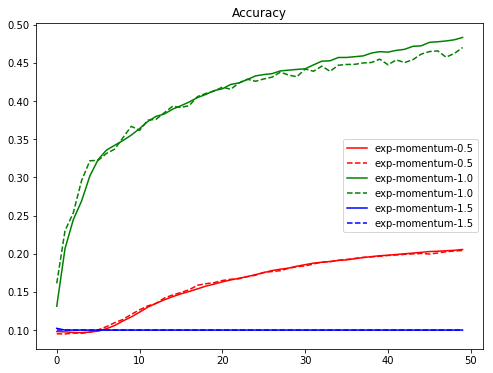

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Draw the results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## nesterov=False

In [12]:
#results = {}
"""
Build the experiment loop
"""
results = {}
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with MOMENTUM = {momentum}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-momentum-{momentum}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.3278 - acc: 0.1146 - val_loss: 2.2386 - val_acc: 0.1555
Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1910 - acc: 0.1894 - val_loss: 2.1314 - val_acc: 0.2255
Epoch 3/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.0853 - acc: 0.2460 - val_loss: 2.0432 - val_acc: 0.2463
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.0147 - acc: 0.2647 - val_loss: 1.9944 - val_acc: 0.2801
Epoch 5/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.9854 - acc: 0.2889 - val_loss: 1.9725 - val_acc: 0.2948
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9517 - acc: 0.3076 - val_loss: 1.9287 - val_acc: 0.3158
Epoch 7/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.9310 - acc: 0.3193 - val_loss: 1.9111 - 

Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 8s 160us/step - lo

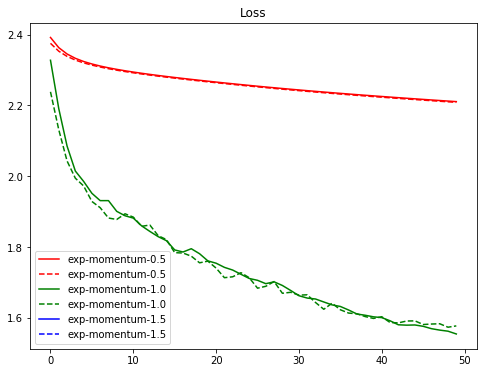

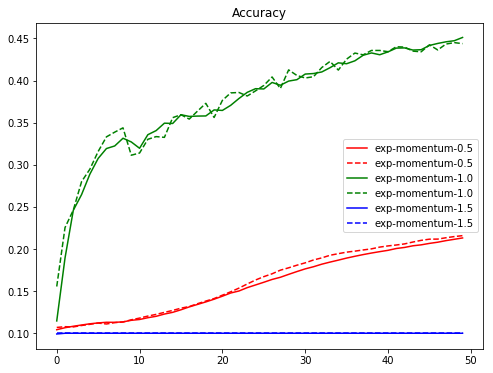

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Draw the results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()